In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
os.chdir("/Users/zyxu/Documents/R/23spring")
# Load the matrix from the CSV file
matrix_data = pd.read_csv("CRC_matrix_data.csv")

matrix_data.shape


(1395, 935)

In [5]:
study_names = pd.read_csv("CRC_study_name.csv")
study_names

,x
0,FengQ_2015
1,FengQ_2015
2,FengQ_2015
3,FengQ_2015
4,FengQ_2015
...,...
1390,ZellerG_2014
1391,ZellerG_2014
1392,ZellerG_2014
1393,ZellerG_2014


In [7]:
total_samples_per_study = study_names.groupby('x').size()
total_samples_per_study

x
FengQ_2015         107
GuptaA_2019         60
HanniganGD_2017     55
ThomasAM_2018a      53
ThomasAM_2018b      60
ThomasAM_2019_c     80
VogtmannE_2016     104
WirbelJ_2018       125
YachidaS_2019      509
YuJ_2015           128
ZellerG_2014       114
dtype: int64

In [16]:
study_names.shape

(1395, 1)

In [11]:
# sns.heatmap(~np.isnan(matrix_data))

<Axes: >

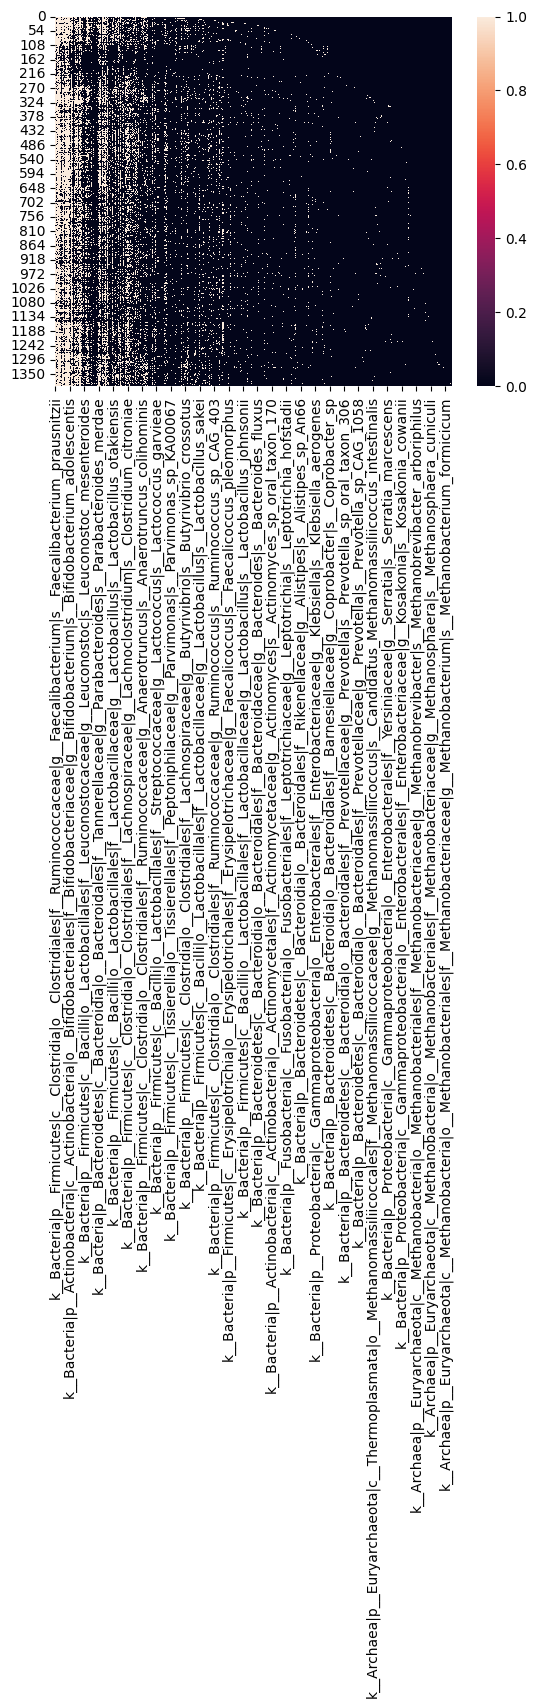

In [17]:
sns.heatmap(np.logical_and(~np.isnan(matrix_data), matrix_data != 0))

In [7]:
np.logical_and(~np.isnan(matrix_data), matrix_data != 0)

,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Streptococcaceae|g__Streptococcus|s__Streptococcus_salivarius,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Anaerostipes|s__Anaerostipes_hadrus,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_stercoris,k__Bacteria|p__Actinobacteria|c__Coriobacteriia|o__Coriobacteriales|f__Coriobacteriaceae|g__Collinsella|s__Collinsella_aerofaciens,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_longum,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_plebeius,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_vulgatus,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Dorea|s__Dorea_longicatena,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Eubacteriaceae|g__Eubacterium|s__Eubacterium_sp_CAG_251,...,k__Eukaryota|p__Ascomycota|c__Saccharomycetes|o__Saccharomycetales|f__Debaryomycetaceae|g__Candida|s__Candida_tropicalis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Leuconostocaceae|g__Weissella|s__Weissella_hellenica,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Staphylococcaceae|g__Staphylococcus|s__Staphylococcus_vitulinus,k__Bacteria|p__Proteobacteria|c__Epsilonproteobacteria|o__Campylobacterales|f__Campylobacteraceae|g__Campylobacter|s__Campylobacter_coli,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Corynebacteriales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_striatum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Corynebacteriales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_pseudodiphtheriticum,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_crustorum,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_farciminis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacterales|f__Enterobacteriaceae|g__Klebsiella|s__Klebsiella_quasivariicola,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinobaculum|s__Actinobaculum_massiliense
0,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,True,True,True,False,True,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,True,True,True,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,True,False
1391,True,True,True,True,True,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,True
1392,True,True,True,True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1393,True,True,True,True,True,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

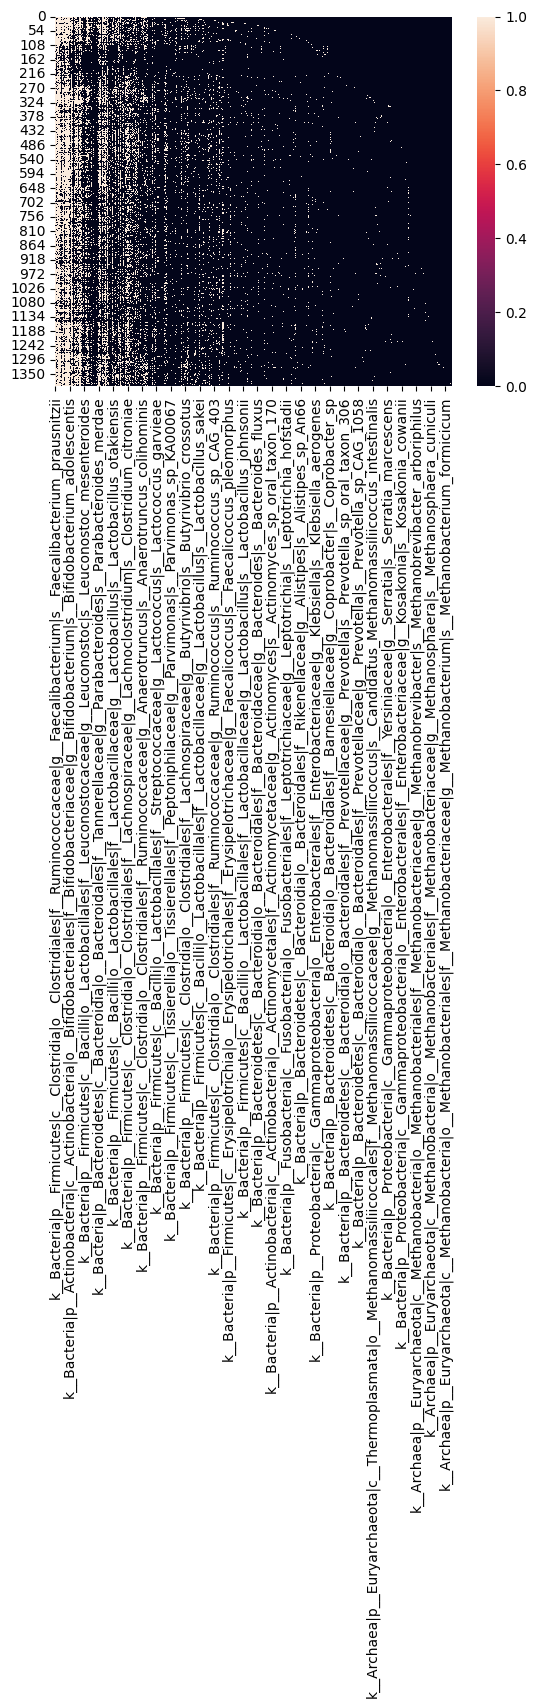

In [14]:
sns.heatmap(matrix_data != 0)

## rows

In [36]:
# Step 1: Find rows where more than 3/4 of the elements are zeros
threshold = 0.95 * matrix_data.shape[1]
rows_with_zeros = (matrix_data == 0).sum(axis=1) > threshold

# Step 2: Index the corresponding rows in the dataframe containing study names
selected_study_names = study_names[rows_with_zeros]
selected_study_names


,x
115,GuptaA_2019
124,GuptaA_2019
125,GuptaA_2019
126,GuptaA_2019
127,GuptaA_2019
...,...
1093,YachidaS_2019
1117,YachidaS_2019
1147,YachidaS_2019
1152,YachidaS_2019


In [37]:
study_names['x'].unique().shape

(11,)

In [38]:
selected_study_names['x'].unique().shape

(8,)

In [39]:
# Assuming study_names is a DataFrame with a column 'study' that contains the study names

# Step 1: Count the total number of samples for each study
total_samples_per_study = study_names.groupby('x').size()

# Step 2: Count the number of samples from selected_study_names for each study
selected_samples_per_study = selected_study_names.groupby('x').size()

# Step 3: Compute the proportion for each study
proportion_selected = selected_samples_per_study / total_samples_per_study

# Display the results
print(proportion_selected)


x
FengQ_2015              NaN
GuptaA_2019        0.516667
HanniganGD_2017    0.618182
ThomasAM_2018a     0.075472
ThomasAM_2018b          NaN
ThomasAM_2019_c    0.050000
VogtmannE_2016     0.019231
WirbelJ_2018       0.008000
YachidaS_2019      0.043222
YuJ_2015                NaN
ZellerG_2014       0.008772
dtype: float64


## cols

In [43]:
threshold = 0.98 * matrix_data.shape[0]
cols_with_zeros = (matrix_data == 0).sum(axis=0) > threshold
selected_species = matrix_data.columns[cols_with_zeros]
selected_species.shape

(517,)

In [45]:
threshold_study = 0.98

results = {}

for species in selected_species:
    species_data = matrix_data[species]
    
    zero_data = study_names.copy()
    zero_data['zeros'] = (species_data == 0)
    
    # Count total and zero samples for each study
    total_samples_per_study = zero_data.groupby('x').size()
    zero_samples_per_study = zero_data.groupby('x').sum()['zeros']
    
    # Find studies with a high proportion of zeros
    high_zero_studies = (zero_samples_per_study / total_samples_per_study) > threshold_study
    
    results[species] = high_zero_studies[high_zero_studies].index.tolist()

print(results)


{'k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Streptococcaceae|g__Streptococcus|s__Streptococcus_sp_HMSC034E03': ['FengQ_2015', 'GuptaA_2019', 'HanniganGD_2017', 'ThomasAM_2018a', 'ThomasAM_2018b', 'VogtmannE_2016', 'WirbelJ_2018', 'YachidaS_2019', 'YuJ_2015', 'ZellerG_2014'], 'k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Cardiobacteriales|f__Cardiobacteriaceae|g__Cardiobacterium|s__Cardiobacterium_valvarum': ['FengQ_2015', 'GuptaA_2019', 'HanniganGD_2017', 'ThomasAM_2018a', 'ThomasAM_2018b', 'ThomasAM_2019_c', 'VogtmannE_2016', 'WirbelJ_2018', 'YachidaS_2019', 'YuJ_2015', 'ZellerG_2014'], 'k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_plantarum': ['GuptaA_2019', 'HanniganGD_2017', 'ThomasAM_2018a', 'VogtmannE_2016', 'YachidaS_2019', 'YuJ_2015'], 'k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Leuconostocaceae|g__Leuconostoc|s__Leuconostoc_pseudomesenteroides': ['GuptaA_2019', 'Hanniga

In [48]:
results.keys()

dict_keys(['k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Streptococcaceae|g__Streptococcus|s__Streptococcus_sp_HMSC034E03', 'k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Cardiobacteriales|f__Cardiobacteriaceae|g__Cardiobacterium|s__Cardiobacterium_valvarum', 'k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_plantarum', 'k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Leuconostocaceae|g__Leuconostoc|s__Leuconostoc_pseudomesenteroides', 'k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis', 'k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_pseudoavium', 'k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_acidophilus', 'k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s

In [50]:
import numpy as np
import pandas as pd

unique_studies = study_names['x'].unique()
study_decompositions = {}

for study in unique_studies:
    # Step 1: Construct C matrix
    C = np.eye(935)
    species_with_high_zeros = results.keys() & set(matrix_data.columns)
    for species in species_with_high_zeros:
        if study in results[species]:
            species_index = matrix_data.columns.get_loc(species)
            C[species_index, species_index] = 0

    # Select rows for the current study
    X = matrix_data[study_names['x'] == study].values
    
    # Step 2: Compute the modified matrix X'
    X_prime = np.dot(X, C)
    
    # Step 3: SVD decomposition on X'
    U, Sigma, Vt = np.linalg.svd(X_prime, full_matrices=False)
    
    # Retain only top 1/10 singular values and vectors
    rank = int(len(X) / 10)
    U = U[:, :rank]
    Sigma = Sigma[:rank]
    Vt = Vt[:rank, :]
    
    study_decompositions[study] = (U, Sigma, Vt, C)


In [51]:
study_decompositions

{'FengQ_2015': (array([[-4.55378108e-05, -8.58555931e-03, -1.21181293e-02, ...,
          -8.60150640e-03,  2.70883171e-02, -1.15464269e-02],
         [-8.19240479e-05, -1.74270510e-02, -2.18665907e-02, ...,
           1.10587914e-02,  6.39490763e-02, -1.33971889e-02],
         [-1.34170043e-04, -4.07114268e-02, -4.99389336e-02, ...,
          -3.16979627e-02,  2.02775348e-02,  6.46315562e-02],
         ...,
         [-1.26461774e-04, -3.36741740e-03, -4.05956743e-02, ...,
           2.46532101e-02,  7.30562983e-02,  1.57716444e-02],
         [-1.93350845e-04, -1.59047994e-02, -9.67958999e-03, ...,
          -7.09806518e-03,  3.22554909e-02, -2.72588043e-02],
         [-4.19716367e-04, -4.31551328e-03, -4.04074723e-02, ...,
           6.23670305e-02, -1.39407014e-02,  1.97889664e-02]]),
  array([13581066.13189289,  4270802.57230627,  2277955.74029746,
          2157326.31996816,  1935430.05809176,  1460299.8160001 ,
           944172.79607282,   879854.10735868,   831095.64319915,
    

### traditional

In [52]:

import numpy as np
import pandas as pd

# Assuming matrix_data is a DataFrame and study_names is a column vector of the same length

unique_studies = study_names['x'].unique()
study_decompositions_traditional = {}

for study in unique_studies:
    # Step 1: Select rows for the current study
    X = matrix_data[study_names['x'] == study].values
    
    # Step 2: SVD decomposition
    U, Sigma, Vt = np.linalg.svd(X, full_matrices=False)
    
    # Step 3: Retain only top 1/10 singular values and vectors
    rank = int(len(X) / 10)
    U = U[:, :rank]
    Sigma = Sigma[:rank]
    Vt = Vt[:rank, :]
    
    # Step 4: Construct C matrix
    C = np.eye(935)
    species_with_high_zeros = results.keys() & set(matrix_data.columns)
    for species in species_with_high_zeros:
        if study in results[species]:
            species_index = matrix_data.columns.get_loc(species)
            C[species_index, species_index] = 0
    
    study_decompositions_traditional[study] = (U, Sigma, Vt, C)


In [59]:
study_decompositions_traditional.keys()

dict_keys(['FengQ_2015', 'GuptaA_2019', 'HanniganGD_2017', 'ThomasAM_2018a', 'ThomasAM_2018b', 'ThomasAM_2019_c', 'VogtmannE_2016', 'WirbelJ_2018', 'YachidaS_2019', 'YuJ_2015', 'ZellerG_2014'])

In [60]:
study_decompositions_traditional['GuptaA_2019'][0].shape

(60, 6)

### compare

In [55]:
len(unique_studies)

11

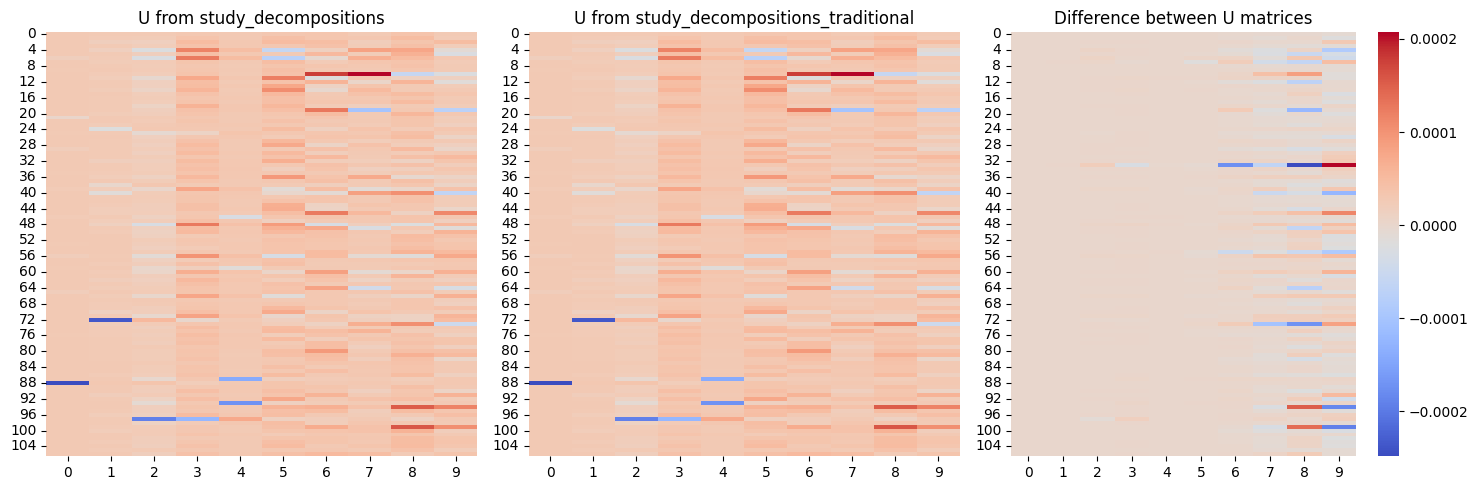

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample study
study = unique_studies[0]

def plot_study_U(study):
    U_study = study_decompositions[study][0]
    U_study_traditional = study_decompositions_traditional[study][0]
    U_difference = U_study - U_study_traditional

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Heatmap of U from study_decompositions
    sns.heatmap(U_study, ax=axes[0], cmap='coolwarm', cbar=False)
    axes[0].set_title('U from study_decompositions')

    # Heatmap of U from study_decompositions_traditional
    sns.heatmap(U_study_traditional, ax=axes[1], cmap='coolwarm', cbar=False)
    axes[1].set_title('U from study_decompositions_traditional')

    # Heatmap of the difference
    sns.heatmap(U_difference, ax=axes[2], cmap='coolwarm')
    axes[2].set_title('Difference between U matrices')

    plt.tight_layout()
    plt.show()
plot_study_U(study)

In [ ]:
for study in unique_studies:
    plot_study_U(study)

## same V

In [62]:
study_names['study'] = study_names['x']
study_names

,x,study
0,FengQ_2015,FengQ_2015
1,FengQ_2015,FengQ_2015
2,FengQ_2015,FengQ_2015
3,FengQ_2015,FengQ_2015
4,FengQ_2015,FengQ_2015
...,...,...
1390,ZellerG_2014,ZellerG_2014
1391,ZellerG_2014,ZellerG_2014
1392,ZellerG_2014,ZellerG_2014
1393,ZellerG_2014,ZellerG_2014


In [1]:
import torch
torch.svd(torch.randn(5,5))

torch.return_types.svd(
U=tensor([[ 0.0471, -0.3360, -0.5155, -0.3881,  0.6845],
        [ 0.7491, -0.2832, -0.1171, -0.3458, -0.4748],
        [-0.0907, -0.8564,  0.1557,  0.4834, -0.0228],
        [-0.5427, -0.1096, -0.6137, -0.1242, -0.5490],
        [ 0.3659,  0.2481, -0.5655,  0.6933,  0.0639]]),
S=tensor([3.5032, 2.9459, 1.4539, 0.6945, 0.2001]),
V=tensor([[ 0.7842,  0.4445, -0.1234,  0.2637, -0.3205],
        [-0.4214,  0.8637,  0.2364,  0.0637,  0.1282],
        [ 0.3569,  0.0501,  0.5784, -0.7207,  0.1272],
        [ 0.2639,  0.0756, -0.3113,  0.0464,  0.9086],
        [-0.1022,  0.2194, -0.7053, -0.6363, -0.1977]]))